In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
import akshare as ak  # 用于获取股票数据
from docx import Document
from docx.shared import Inches
from datetime import datetime
import os
import time

In [4]:
# 定义要查询的股票列表
stock_list = [ "002247", "300638","300641", "603088", "001309", "000526", "300002", "300693", "300532"]
#stock_list = [ "000801"]

In [5]:
#训练次数
epochs_time = 20
#依据天数
seq_length_day = 30

In [6]:
# 获取股票数据
def get_stock_data(stock_code, start="20100101", end="20250211"):
    data = ak.stock_zh_a_hist(symbol=stock_code, period="daily", start_date=start, end_date=end, adjust="qfq")
    data.set_index("日期", inplace=True)  # 将日期列设置为索引
    return data  # 返回所有数据

In [7]:
# 1️⃣ 获取当前时间作为文件名前缀
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")  # 格式：YYYYMMDD_HHMMSS
output_file = f"out_data/{current_time}_lstm.docx"
# 2️⃣ 创建 Word 文档
doc = Document()
# 3️⃣ 添加文本（今天的日期）
today = datetime.today().date()
doc.add_paragraph(f"{today} LTSM Test")

正在处理股票: 002247
Epoch 1/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0094 - val_loss: 1.0452e-04
Epoch 2/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0013 - val_loss: 9.1245e-05
Epoch 3/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 9.3863e-04 - val_loss: 1.8017e-04
Epoch 4/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.6204e-04 - val_loss: 6.3688e-05
Epoch 5/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 6.4063e-04 - val_loss: 5.4438e-05
Epoch 6/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.5909e-04 - val_loss: 5.1746e-05
Epoch 7/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.9131e-04 - val_loss: 1.6180e-04
Epoch 8/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 5.3313e-04 - val_loss: 7.4354e-05
Epoch 9/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.7609e-04 - val_loss: 9.4710e-05
Epoch 10/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 4.7808e-04 - val_loss: 1.0880e-04
Epoch 11/20
176/176 ━━━━━━━━━━━━━━━━━━━━ 2

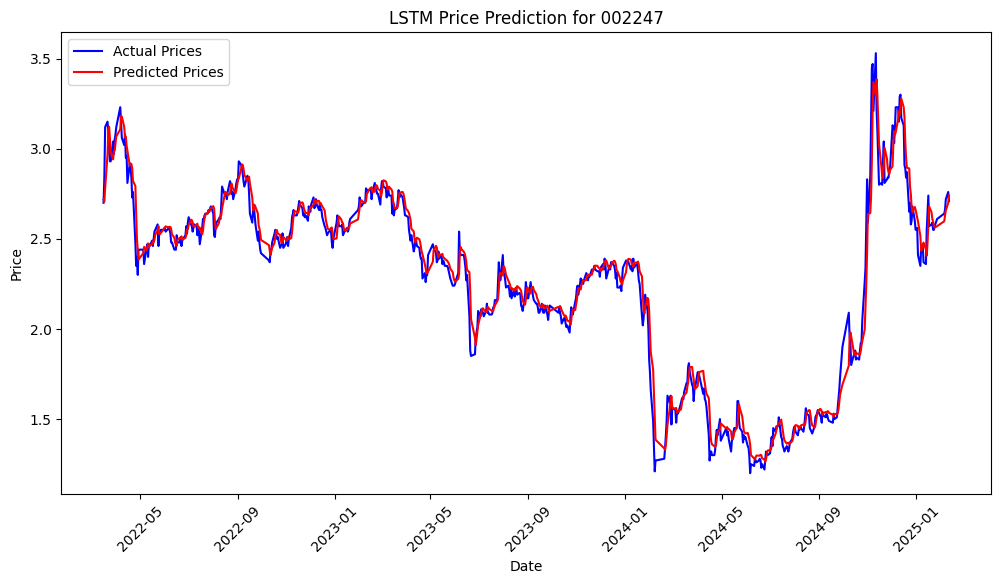

图表已保存到：temp_png/002247_10_day_price_prediction.png


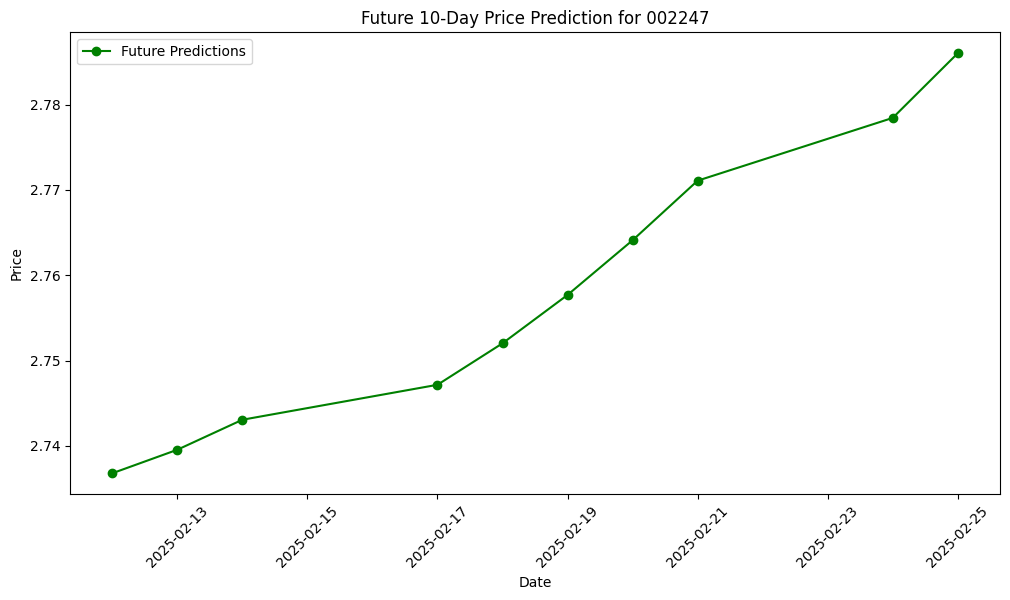

最后一天的日期: 2025-02-11, 收盘价格: 2.71, 预测价格: 2.740521192550659
预测日期: 2025-02-12 00:00:00, 预测价格: 2.73679256439209
预测日期: 2025-02-13 00:00:00, 预测价格: 2.7395479679107666
预测日期: 2025-02-14 00:00:00, 预测价格: 2.7430617809295654
预测日期: 2025-02-17 00:00:00, 预测价格: 2.747159719467163
预测日期: 2025-02-18 00:00:00, 预测价格: 2.752018690109253
预测日期: 2025-02-19 00:00:00, 预测价格: 2.7576870918273926
预测日期: 2025-02-20 00:00:00, 预测价格: 2.7640953063964844
预测日期: 2025-02-21 00:00:00, 预测价格: 2.7710766792297363
预测日期: 2025-02-24 00:00:00, 预测价格: 2.778432846069336
预测日期: 2025-02-25 00:00:00, 预测价格: 2.786008596420288
正在处理股票: 300638
Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0465 - val_loss: 0.0034
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0012 - val_loss: 0.0025
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0013 - val_lo

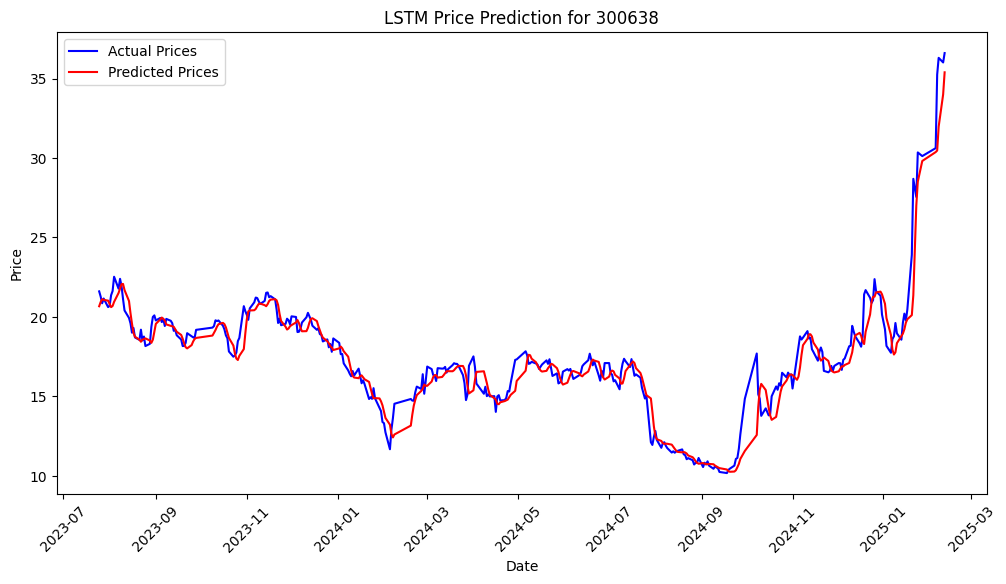

图表已保存到：temp_png/300638_10_day_price_prediction.png


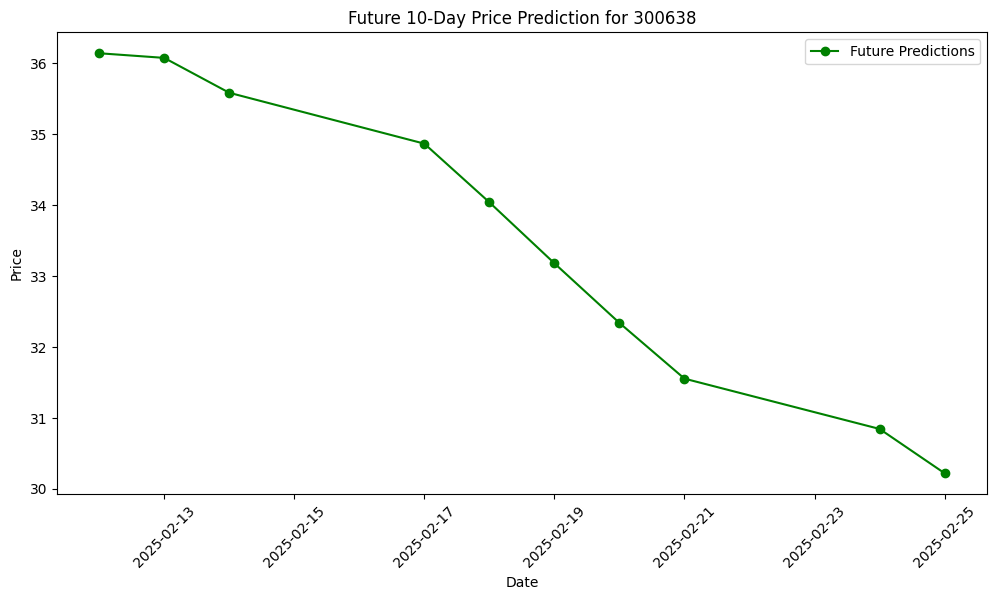

最后一天的日期: 2025-02-11, 收盘价格: 36.6, 预测价格: 35.38982009887695
预测日期: 2025-02-12 00:00:00, 预测价格: 36.14390563964844
预测日期: 2025-02-13 00:00:00, 预测价格: 36.078590393066406
预测日期: 2025-02-14 00:00:00, 预测价格: 35.58653259277344
预测日期: 2025-02-17 00:00:00, 预测价格: 34.86865234375
预测日期: 2025-02-18 00:00:00, 预测价格: 34.0415153503418
预测日期: 2025-02-19 00:00:00, 预测价格: 33.18102264404297
预测日期: 2025-02-20 00:00:00, 预测价格: 32.34005355834961
预测日期: 2025-02-21 00:00:00, 预测价格: 31.55429458618164
预测日期: 2025-02-24 00:00:00, 预测价格: 30.844772338867188
预测日期: 2025-02-25 00:00:00, 预测价格: 30.219898223876953
正在处理股票: 300641
Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0026 - val_loss: 0.0083
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.7412e-04 - val_loss: 0.0071
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.6862e-04 - val_loss: 0.0057
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 208ms/step - loss: 1.4678e-04 - val_loss: 0.0052
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ -17s -182550us/step - loss:

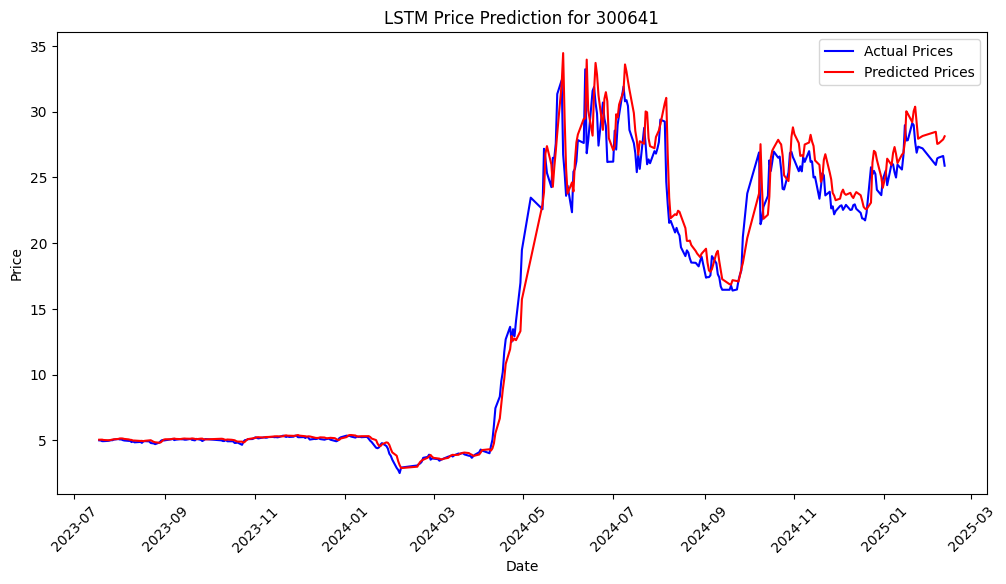

图表已保存到：temp_png/300641_10_day_price_prediction.png


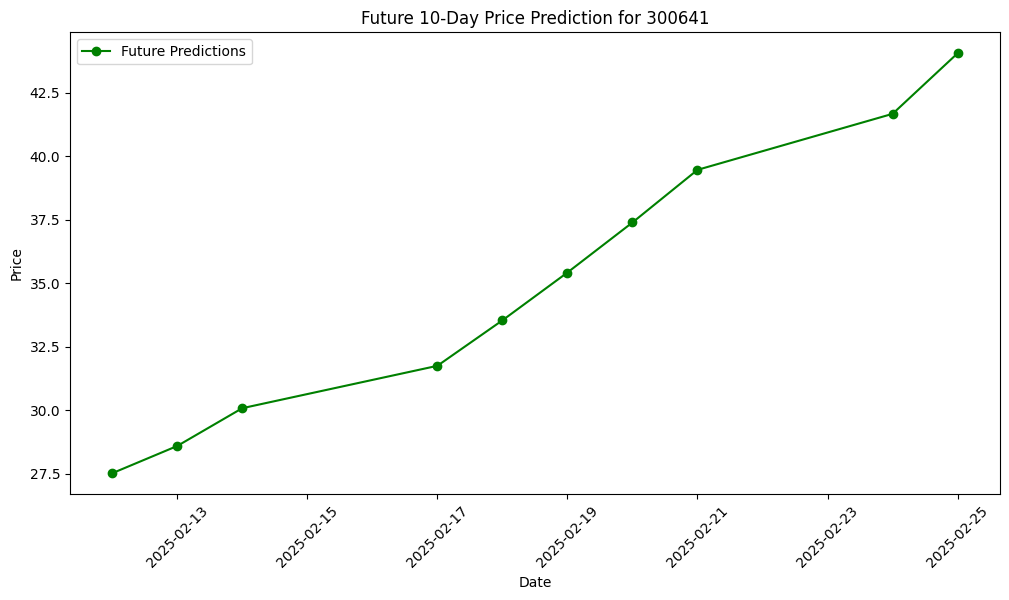

最后一天的日期: 2025-02-11, 收盘价格: 25.89, 预测价格: 28.1292667388916
预测日期: 2025-02-12 00:00:00, 预测价格: 27.518898010253906
预测日期: 2025-02-13 00:00:00, 预测价格: 28.592565536499023
预测日期: 2025-02-14 00:00:00, 预测价格: 30.081172943115234
预测日期: 2025-02-17 00:00:00, 预测价格: 31.750276565551758
预测日期: 2025-02-18 00:00:00, 预测价格: 33.540557861328125
预测日期: 2025-02-19 00:00:00, 预测价格: 35.42460632324219
预测日期: 2025-02-20 00:00:00, 预测价格: 37.396026611328125
预测日期: 2025-02-21 00:00:00, 预测价格: 39.46881103515625
预测日期: 2025-02-24 00:00:00, 预测价格: 41.67509460449219
预测日期: 2025-02-25 00:00:00, 预测价格: 44.061058044433594
正在处理股票: 603088
Epoch 1/20
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0188

In [ ]:
for stock_code in stock_list:
    print(f"正在处理股票: {stock_code}")
    
    # 数据准备
    stock_data = get_stock_data(stock_code)
    price_data = stock_data[["收盘"]]  # 只用于价格预测
    scaler = MinMaxScaler(feature_range=(0, 1))  # 归一化数据到 [0, 1] 范围
    scaled_data = scaler.fit_transform(price_data)  # 归一化数据
    
    # 创建序列数据
    def create_sequences(data, seq_length=60):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i + seq_length])
            y.append(data[i + seq_length])
        return np.array(X), np.array(y)
    
    seq_length = seq_length_day
    X, y = create_sequences(scaled_data, seq_length)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    
    # 划分训练集和测试集
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # 构建LSTM模型
    model = Sequential([
        Input(shape=(seq_length, 1)),
        LSTM(50, return_sequences=True),
        LSTM(50),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    
    # 训练模型
    model.fit(X_train, y_train, epochs=epochs_time, batch_size=16, validation_data=(X_test, y_test))
    
    # 预测
    predicted = model.predict(X_test)
    predicted = scaler.inverse_transform(predicted)
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # 获取倒数第二天的时间和收盘价格，倒数第一天的时间和预测价格
    last_date = price_data.index[-1]
    last_real_price = price_data.iloc[-1]["收盘"]
    last_predicted_price = predicted[-1][0]
    
    # 预测接下来10天的价格
    future_prices = []
    future_dates = pd.date_range(start=last_date, periods=11, freq='B')[1:]
    last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, 1)
    
    for i in range(10):
        next_day_scaled = model.predict(last_sequence)
        next_day_price = scaler.inverse_transform(next_day_scaled)[0][0]
        future_prices.append(next_day_price)
        
        # 更新 last_sequence 以预测下一天
        new_sequence = np.append(last_sequence[:, 1:, :], next_day_scaled.reshape(1, 1, 1), axis=1)
        last_sequence = new_sequence
    
    # 输出结果
    print(f"股票 {stock_code}:")
    doc.add_paragraph("\n\n")
    doc.add_paragraph(f"股票 {stock_code}:------------------------------------------")
  
    # 可视化
    plt.figure(figsize=(12, 6))
    plt.plot(price_data.index[-len(y_test_actual):], y_test_actual, label='Actual Prices', color='blue')
    plt.plot(price_data.index[-len(predicted):], predicted, label='Predicted Prices', color='red')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.title(f'LSTM Price Prediction for {stock_code}')

    # 保存图表到本地
    output_path = f"temp_png/{stock_code}_price_prediction.png"  # 图片保存路径
    plt.savefig(output_path, bbox_inches='tight', dpi=300)  # 保存为 PNG 文件
    print(f"图表已保存到：{output_path}")
    # 5️⃣ 插入图片到 Word 文档
    doc.add_paragraph(f"{stock_code}拟合曲线：")
    doc.add_picture(output_path, width=Inches(8))  # 插入图片并调整宽度
    
    plt.show()
    
    # 绘制未来10天的预测价格走势
    plt.figure(figsize=(12, 6))
    plt.plot(future_dates, future_prices, marker='o', linestyle='-', color='green', label='Future Predictions')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.title(f'Future 10-Day Price Prediction for {stock_code}')

    # 保存图表到本地
    output_path = f"temp_png/{stock_code}_10_day_price_prediction.png"  # 图片保存路径
    plt.savefig(output_path, bbox_inches='tight', dpi=300)  # 保存为 PNG 文件
    print(f"图表已保存到：{output_path}")
    # 5️⃣ 插入图片到 Word 文档
    doc.add_paragraph(f"{stock_code}预测走势图：")
    doc.add_picture(output_path, width=Inches(8))  # 插入图片并调整宽度
    plt.show()

    last_day_desc = f"最后一天的日期: {last_date}, 收盘价格: {last_real_price}, 预测价格: {last_predicted_price}"
    print(last_day_desc)
    doc.add_paragraph(last_day_desc)
    for i in range(10):
        desc = f"预测日期: {future_dates[i]}, 预测价格: {future_prices[i]}"
        doc.add_paragraph(desc)
        print(desc)

# 6️⃣ 保存 Word 文档
doc.save(output_file)
print(f"✅ Word 文档已保存: {output_file}")